In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#Cargamos el archivo diamonds.csv
diamantes = pd.read_csv('diamonds.csv')
diamantes

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,NaN,58.0,2757.0,6.15,6.12,3.74


In [3]:
df_numeric=diamantes.copy()
df_numeric=df_numeric.drop(['cut','color','clarity'],axis=1)
df_numeric

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,NaN,58.0,2757.0,6.15,6.12,3.74


In [4]:
#Remplazamos los valores faltantes por la media aritmetica
df2=df_numeric.copy
df2=df_numeric.fillna(round(diamantes.mean(),1))
df2

/var/folders/zv/01rx8f0176x702fr56drfp1m0000gn/T/ipykernel_7629/591177780.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2=df_numeric.fillna(round(diamantes.mean(),1))


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


***************PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME*****************

In [5]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df2
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido carat        2.219953
depth       66.047217
table       64.160560
price    15901.154414
x            9.096441
y            9.160929
z            5.655794
dtype: float64
Limite inferior permitido carat      -0.624090
depth      57.451571
table      50.753974
price   -8035.391985
x           2.365894
y           2.308121
z           1.421668
dtype: float64


In [6]:
#Encontramos Ouliers del Dataframe
outliers= df2[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,carat,depth,table,price,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,56.9,65.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
53935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53938,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Obtenemos datos sin outliers del DataFrame
df3= df2[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df3

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,NaN,NaN,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [8]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
df_clean=df3.copy()
df_clean=df_clean.fillna(round(df3.mean(),1))
df_clean

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [9]:
#Archivo con datos limpios
df_clean.to_csv('diamonds2.csv')

***************PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME*****************

In [10]:
#Cargamos el archivo diamonds.csv
df4 = pd.read_csv('diamonds2.csv')
df4

,Unnamed: 0,carat,depth,table,price,x,y,z
0,0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [12]:
#CARAT

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df4[['carat']]
Var_Dep= df4['price']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model_carat= LinearRegression()
type(model_carat)
model_carat.fit(X=Vars_Indep, y=Var_Dep)
model_carat.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6524.32217555]),
 'rank_': 1,
 'singular_': array([104.13800591]),
 'intercept_': -1489.9771929141666}

In [13]:
#MODELO PREDICTIVO
#Predecimos los valores de total de accidentes a partir de la variable 
y_pred= model_carat.predict(X=df4[['carat']])
y_pred

array([  10.61690746, -119.86953605,   10.61690746, ..., 3077.04832997,
       4120.93987806, 3403.26443875])

In [14]:
#Insertamos la columna de predicciones en el DataFrame
df4.insert(0, 'Predicciones', y_pred)
df4

,Predicciones,Unnamed: 0,carat,depth,table,price,x,y,z
0,10.616907,0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,-119.869536,1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,10.616907,2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,402.076238,3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,532.562682,4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,3207.534773,53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3207.534773,53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,3077.048330,53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,4120.939878,53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


<AxesSubplot:xlabel='carat', ylabel='price'>

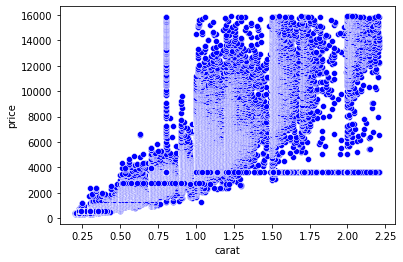

In [15]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='carat', y='price', color="blue", data=df4)

In [16]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
model_carat.score(X=Vars_Indep, y=Var_Dep)

0.723736317781156

DEPTH

In [17]:
#DEPTH

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep1= df4[['depth']]
Var_Dep1= df4['price']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model_depth= LinearRegression()
type(model_depth)
model_depth.fit(X=Vars_Indep1, y=Var_Dep1)
model_depth.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['depth'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-6.37905433]),
 'rank_': 1,
 'singular_': array([295.83615478]),
 'intercept_': 4021.4734912098634}

In [18]:
#MODELO PREDICTIVO
#Predecimos los valores de total de accidentes a partir de la variable 
y_pred1= model_depth.predict(X=df4[['depth']])
y_pred1

array([3629.16164989, 3640.00604225, 3627.88583902, ..., 3620.86887926,
       3627.88583902, 3624.69631186])

In [19]:
#Insertamos la columna de predicciones en el DataFrame
df4.insert(0, 'Predicciones_depth', y_pred1)
df4

,Predicciones_depth,Predicciones,Unnamed: 0,carat,depth,table,price,x,y,z
0,3629.161650,10.616907,0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,3640.006042,-119.869536,1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,3627.885839,10.616907,2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,3623.420501,402.076238,3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,3617.679352,532.562682,4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,3633.626988,3207.534773,53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3618.955163,3207.534773,53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,3620.868879,3077.048330,53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,3627.885839,4120.939878,53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


<AxesSubplot:xlabel='depth', ylabel='price'>

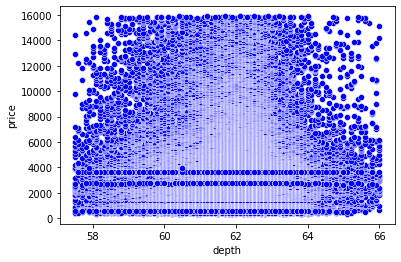

In [20]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='depth', y='price', color="blue", data=df4)

In [21]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
model_depth.score(X=Vars_Indep1, y=Var_Dep1)

5.5834952963351725e-06

TABLE

In [22]:
#TABLE

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= df4[['table']]
Var_Dep2= df4['price']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model_table= LinearRegression()
type(model_table)
model_table.fit(X=Vars_Indep2, y=Var_Dep2)
model_table.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['table'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([208.29125418]),
 'rank_': 1,
 'singular_': array([491.13052505]),
 'intercept_': -8329.24118401006}

In [23]:
#MODELO PREDICTIVO
#Predecimos los valores de total de accidentes a partir de la variable 
y_pred2= model_table.predict(X=df4[['table']])
y_pred2

array([3126.777796  , 4376.52532109, 3626.67680603, ..., 4168.23406691,
       3751.65155854, 3126.777796  ])

In [24]:
#Insertamos la columna de predicciones en el DataFrame
df4.insert(0, 'Predicciones_table', y_pred2)
df4

,Predicciones_table,Predicciones_depth,Predicciones,Unnamed: 0,carat,depth,table,price,x,y,z
0,3126.777796,3629.161650,10.616907,0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,4376.525321,3640.006042,-119.869536,1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,3626.676806,3627.885839,10.616907,2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,3751.651559,3623.420501,402.076238,3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,3751.651559,3617.679352,532.562682,4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,3543.360304,3633.626988,3207.534773,53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3126.777796,3618.955163,3207.534773,53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,4168.234067,3620.868879,3077.048330,53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,3751.651559,3627.885839,4120.939878,53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


<AxesSubplot:xlabel='table', ylabel='price'>

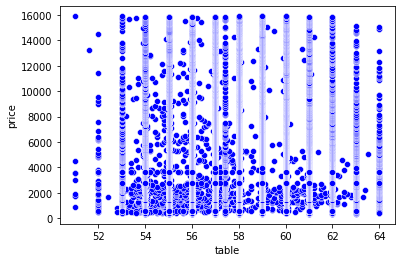

In [25]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='table', y='price', color="blue", data=df4)

In [26]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
model_table.score(X=Vars_Indep2, y=Var_Dep2)

0.01640691694328733

CARAT Y DEPTH

In [27]:
#Definimos la función del modelo de predicción

model_caratdepth=smf.ols(formula="price~carat+depth", data=df4).fit()
print(model_caratdepth.params)

Intercept     506.079761
carat        6525.360690
depth         -32.342408
dtype: float64


In [ ]:
#Agregamos la columna de predicción al dataframe
Form= 506.079761+ 6525.360690*df4['carat'] -32.342408*df4['depth']
df4.insert(loc=0, column='Predicciones_caratydepth', value=Form)
#print (df4)

<AxesSubplot:xlabel='carat', ylabel='price'>

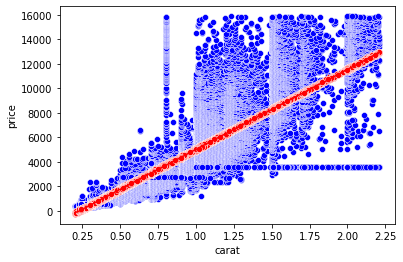

In [31]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='carat', y='price', color="blue", data=df4)
sns.scatterplot(x='carat', y='Predicciones_caratydepth', color="red", data=df4)
sns.lineplot(x='carat', y='Predicciones_caratydepth', color="red", data=df4)

In [32]:
#Calculamos el coeficiente de Determinación R cuadrado
print(model_caratdepth.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 7.070e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:30:27   Log-Likelihood:            -4.8106e+05
No. Observations:               53940   AIC:                         9.621e+05
Df Residuals:                   53937   BIC:                         9.621e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    506.0798    377.322      1.341      0.1

In [33]:
#Calculamos el coeficiente de correlación R 
correlacion_caratydepth= np.sqrt(0.724)
print (correlacion_caratydepth)

0.8508818954473059


CARAT Y TABLE

In [34]:
#Definimos la función del modelo de predicción

model_caratable=smf.ols(formula="price~carat+table", data=df4).fit()
print(model_caratable.params)

Intercept    1328.485899
carat        6567.736426
table         -49.691490
dtype: float64


In [35]:
#Agregamos la columna de predicción al dataframe
Form= 1328.485899+ 6567.736426*df4['carat'] -49.691490*df4['table']
df4.insert(loc=0, column='Predicciones_caratable', value=Form)
#print (df4)

<AxesSubplot:xlabel='carat', ylabel='price'>

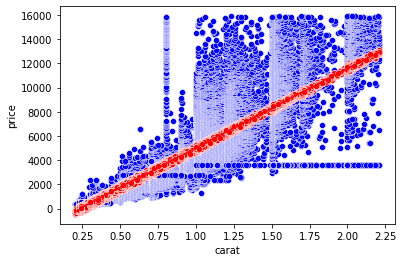

In [36]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='carat', y='price', color="blue", data=df4)
sns.scatterplot(x='carat', y='Predicciones_caratable', color="red", data=df4)
sns.lineplot(x='carat', y='Predicciones_caratable', color="red", data=df4)

In [37]:
#Calculamos el coeficiente de Determinación R cuadrado
print(model_caratable.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 7.097e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:38:14   Log-Likelihood:            -4.8098e+05
No. Observations:               53940   AIC:                         9.620e+05
Df Residuals:                   53937   BIC:                         9.620e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1328.4859    212.647      6.247      0.0

In [38]:
#Calculamos el coeficiente de correlación R 
correlacion_caratable= np.sqrt(0.725)
print (correlacion_caratable)

0.85146931829632


DEPTH Y TABLE

In [39]:
#Definimos la función del modelo de predicción

model_depthtable=smf.ols(formula="price~depth+table", data=df4).fit()
print(model_depthtable.params)

Intercept   -15236.843922
depth           96.852273
table          224.453565
dtype: float64


In [40]:
#Agregamos la columna de predicción al dataframe
Form= -15236.843922 + 96.8522736*df4['depth'] + 224.453565*df4['table']
df4.insert(loc=0, column='Predicciones_depthtable', value=Form)
#print (df4)

<AxesSubplot:xlabel='depth', ylabel='price'>

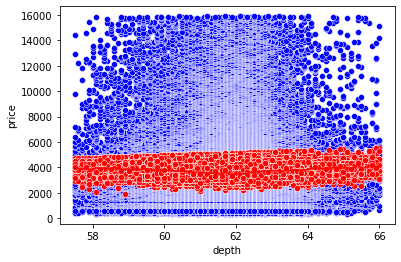

In [41]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='depth', y='price', color="blue", data=df4)
sns.scatterplot(x='depth', y='Predicciones_depthtable', color="red", data=df4)
sns.lineplot(x='depth', y='Predicciones_depthtable', color="red", data=df4)

In [42]:
#Calculamos el coeficiente de Determinación R cuadrado
print(model_depthtable.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     483.0
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          1.22e-208
Time:                        18:45:03   Log-Likelihood:            -5.1528e+05
No. Observations:               53940   AIC:                         1.031e+06
Df Residuals:                   53937   BIC:                         1.031e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.524e+04    943.546    -16.148      0.0

In [43]:
#Calculamos el coeficiente de correlación R 
correlacion_depthtable= np.sqrt(0.018)
print (correlacion_depthtable)

0.1341640786499874


TAMAÑO (X,Y,Z)

In [44]:
#Definimos la función del modelo de predicción

model_tamaño=smf.ols(formula="price~x+y+z", data=df4).fit()
print(model_tamaño.params)

Intercept   -11408.601188
x              -48.378803
y             1922.001385
z             1214.360434
dtype: float64


In [45]:
#Agregamos la columna de predicción al dataframe
Form= -11408.601188 -48.3788036*df4['x'] + 1922.001385*df4['y'] + 1214.360434*df4['z']
df4.insert(loc=0, column='Predicciones_tamaño', value=Form)
#print (df4)

<AxesSubplot:xlabel='x', ylabel='price'>

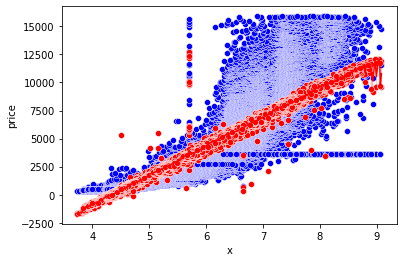

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='x', y='price', color="blue", data=df4)
sns.scatterplot(x='x', y='Predicciones_tamaño', color="red", data=df4)
sns.lineplot(x='x', y='Predicciones_tamaño', color="red", data=df4)

In [47]:
#Calculamos el coeficiente de Determinación R cuadrado
print(model_tamaño.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                 4.491e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:50:02   Log-Likelihood:            -4.8199e+05
No. Observations:               53940   AIC:                         9.640e+05
Df Residuals:                   53936   BIC:                         9.640e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.141e+04     41.844   -272.646      0.0

In [48]:
#Calculamos el coeficiente de correlación R 
correlacion_tamaño= np.sqrt(0.714)
print (correlacion_tamaño)

0.8449852069711044


TAMAÑO, CARAT Y DEPTH

In [11]:
#Definimos la función del modelo de predicción

model_penultimo=smf.ols(formula="price~x+y+z+carat+depth", data=df4).fit()
print(model_penultimo.params)

Intercept   -5370.813822
x            -916.969778
y            1826.871723
z             315.369626
carat        3928.659726
depth          -6.750356
dtype: float64


In [12]:
#Agregamos la columna de predicción al dataframe
Form= -5370.813822 -916.969778*df4['x'] + 1826.871723*df4['y'] + 315.369626*df4['z'] + 3928.659726*df4['carat'] -6.750356*df4['depth']
df4.insert(loc=0, column='Predicciones_penultimo', value=Form)
#print (df4)

<AxesSubplot:xlabel='x', ylabel='price'>

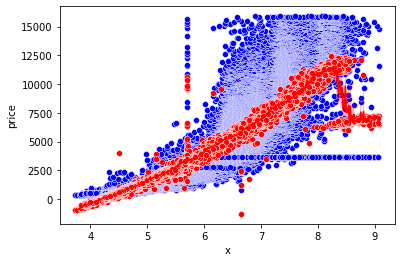

In [13]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='x', y='price', color="blue", data=df4)
sns.scatterplot(x='x', y='Predicciones_penultimo', color="red", data=df4)
sns.lineplot(x='x', y='Predicciones_penultimo', color="red", data=df4)

In [14]:
#Calculamos el coeficiente de Determinación R cuadrado
print(model_penultimo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                 2.996e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:11:36   Log-Likelihood:            -4.7992e+05
No. Observations:               53940   AIC:                         9.598e+05
Df Residuals:                   53934   BIC:                         9.599e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5370.8138    559.485     -9.600      0.0

In [15]:
#Calculamos el coeficiente de correlación R 
correlacion_penultimo= np.sqrt(0.735)
print (correlacion_penultimo)

0.8573214099741123


TAMAÑO, CARAT, DEPTH Y TABLE

In [16]:
#Definimos la función del modelo de predicción

model_ultimo=smf.ols(formula="price~x+y+z+carat+depth+table", data=df4).fit()
print(model_ultimo.params)

Intercept    -618.205282
x            -757.151031
y            1710.406537
z             252.940851
carat        3966.759954
depth         -30.246024
table         -58.515708
dtype: float64


In [17]:
#Agregamos la columna de predicción al dataframe
Form= -618.205282 -757.151031*df4['x'] + 1710.406537*df4['y'] + 252.940851*df4['z'] + 3966.759954*df4['carat'] -30.246024*df4['depth'] -58.515708*df4['table']
df4.insert(loc=0, column='Predicciones_ultimo', value=Form)
#print (df4)

<AxesSubplot:xlabel='x', ylabel='price'>

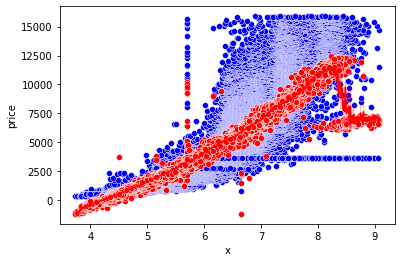

In [18]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='x', y='price', color="blue", data=df4)
sns.scatterplot(x='x', y='Predicciones_ultimo', color="red", data=df4)
sns.lineplot(x='x', y='Predicciones_ultimo', color="red", data=df4)

In [19]:
#Calculamos el coeficiente de Determinación R cuadrado
print(model_ultimo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 2.511e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:18:27   Log-Likelihood:            -4.7980e+05
No. Observations:               53940   AIC:                         9.596e+05
Df Residuals:                   53933   BIC:                         9.597e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -618.2053    639.214     -0.967      0.3

In [21]:
#Calculamos el coeficiente de correlación R 
correlacion_ultimo= np.sqrt(0.736)
print (correlacion_ultimo)

0.8579044235810886


********************Mapa de calor********************

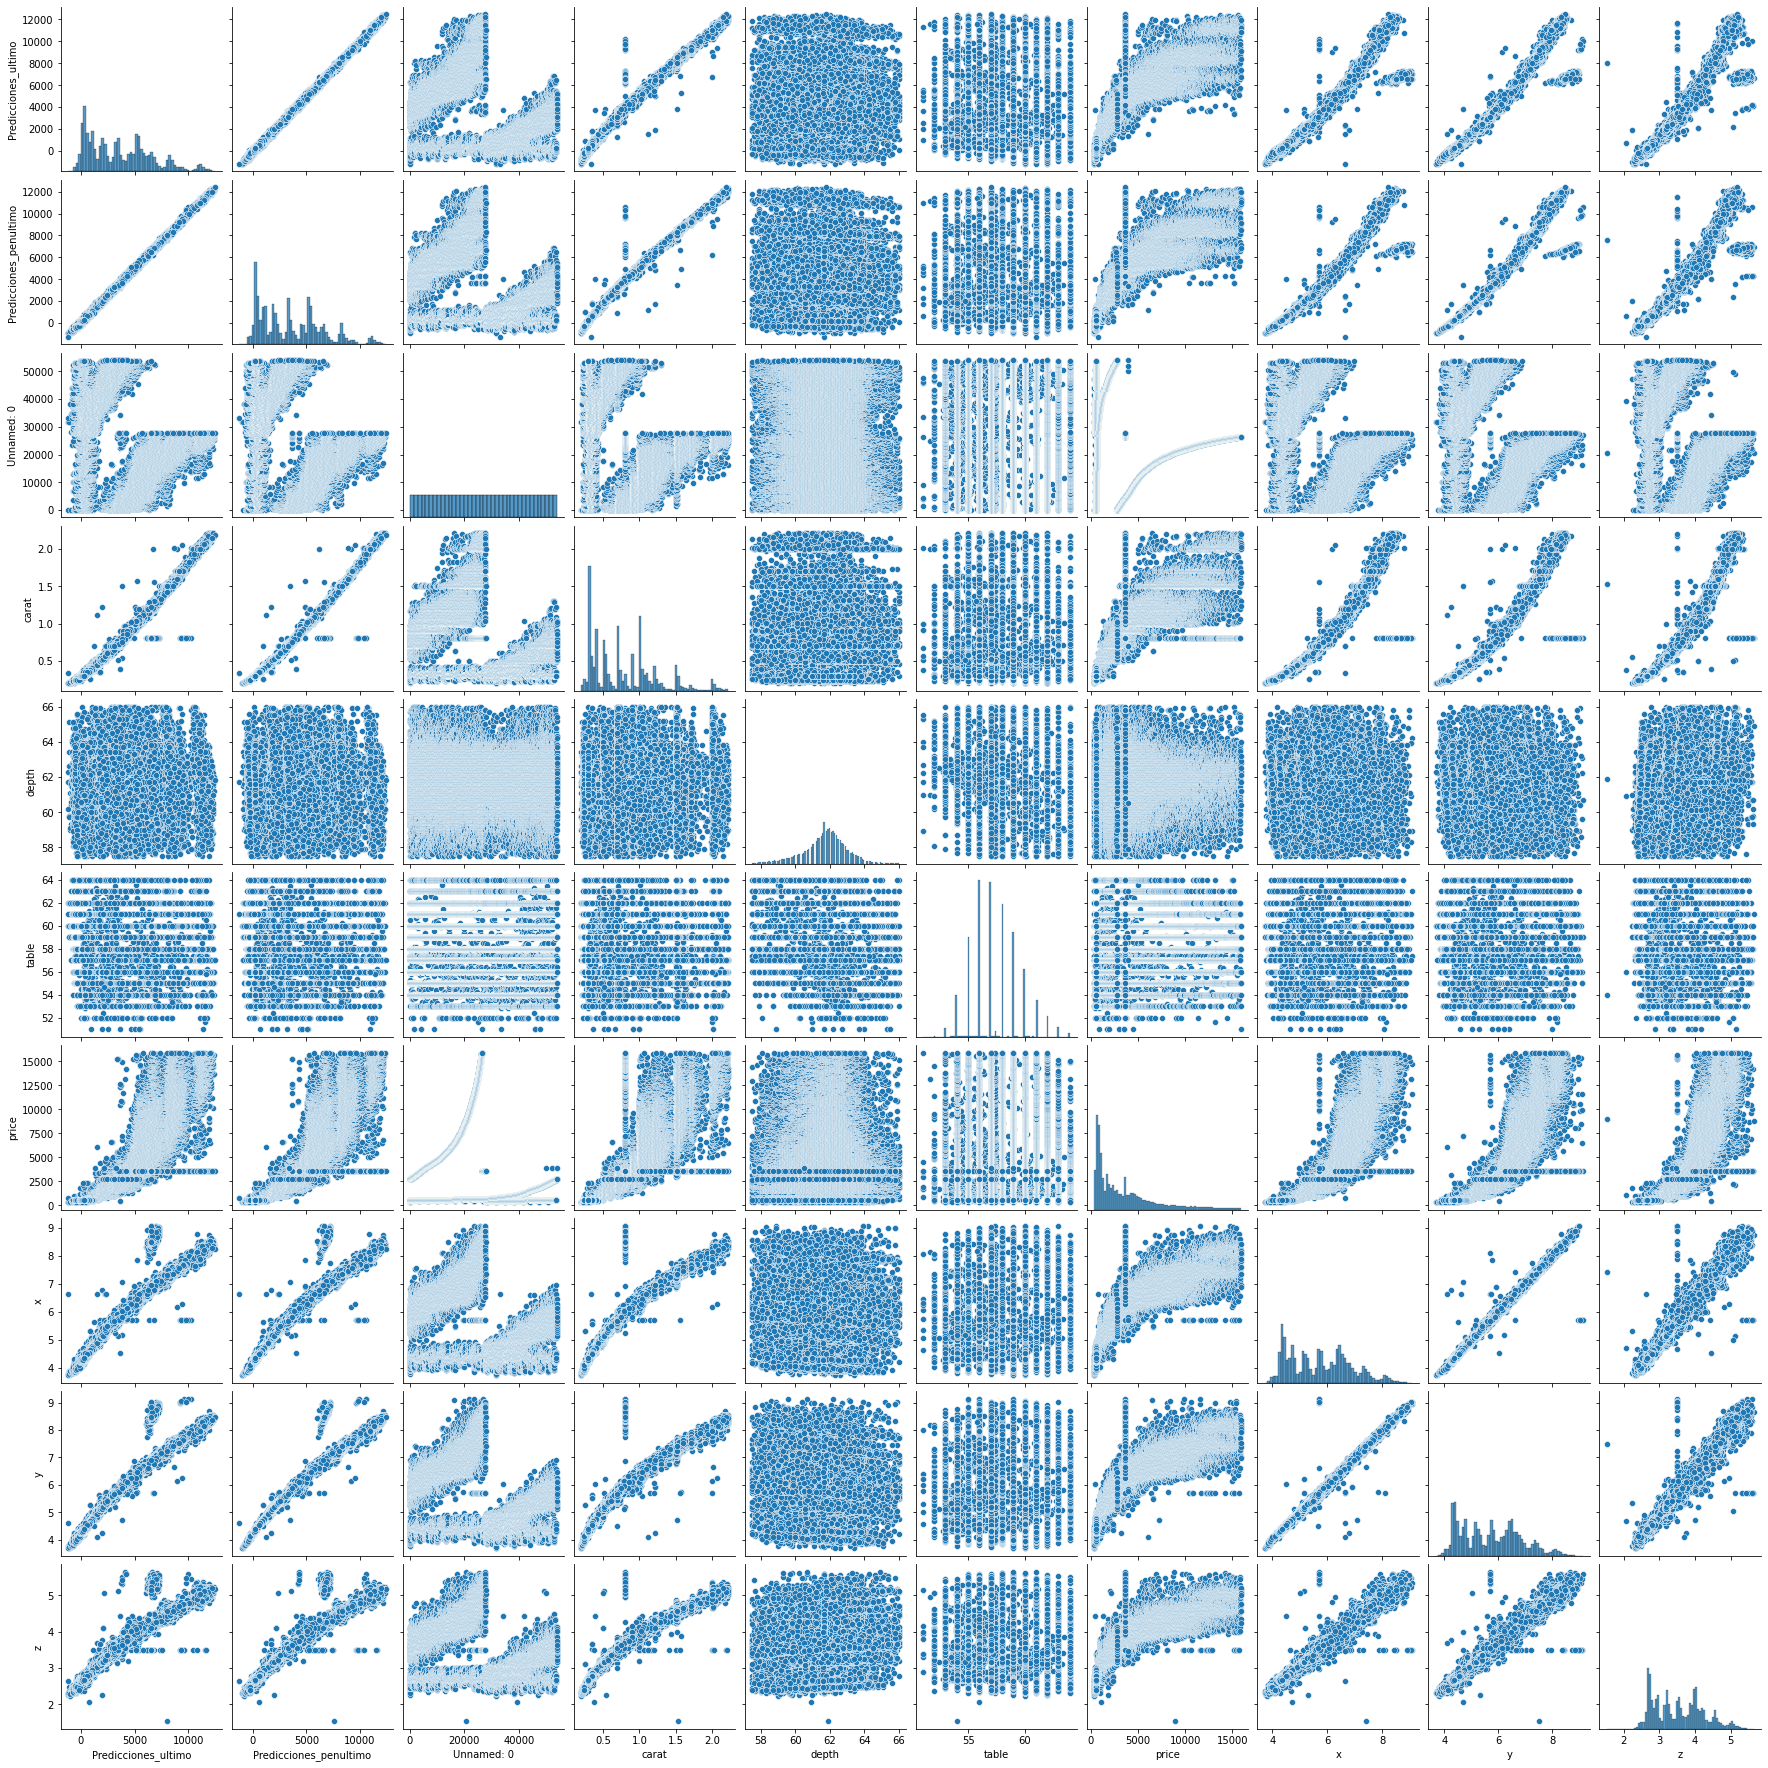

In [22]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df4)

In [23]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df4.corr()
Corr_Factors

,Predicciones_ultimo,Predicciones_penultimo,Unnamed: 0,carat,depth,table,price,x,y,z
Predicciones_ultimo,1.000000,0.999226,-0.404167,0.991356,-0.002754,0.149263,0.858144,0.982305,0.983847,0.979032
Predicciones_penultimo,0.999226,1.000000,-0.406313,0.992124,-0.002756,0.186295,0.857481,0.983066,0.984609,0.979790
Unnamed: 0,-0.404167,-0.406313,1.000000,-0.397124,-0.036129,-0.108379,-0.356672,-0.407460,-0.408163,-0.410413
carat,0.991356,0.992124,-0.397124,1.000000,0.011303,0.185252,0.850727,0.957223,0.955947,0.955040
depth,-0.002754,-0.002756,-0.036129,0.011303,1.000000,-0.277038,-0.002363,-0.031844,-0.033726,0.074941
table,0.149263,0.186295,-0.108379,0.185252,-0.277038,1.000000,0.128089,0.195969,0.190798,0.159849
price,0.858144,0.857481,-0.356672,0.850727,-0.002363,0.128089,1.000000,0.842960,0.844283,0.840151
x,0.982305,0.983066,-0.407460,0.957223,-0.031844,0.195969,0.842960,1.000000,0.997742,0.989112
y,0.983847,0.984609,-0.408163,0.955947,-0.033726,0.190798,0.844283,0.997742,1.000000,0.988657
z,0.979032,0.979790,-0.410413,0.955040,0.074941,0.159849,0.840151,0.989112,0.988657,1.000000


In [24]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones_ultimo,Predicciones_penultimo,Unnamed: 0,carat,depth,table,price,x,y,z
Predicciones_ultimo,1.000000,0.999226,0.404167,0.991356,0.002754,0.149263,0.858144,0.982305,0.983847,0.979032
Predicciones_penultimo,0.999226,1.000000,0.406313,0.992124,0.002756,0.186295,0.857481,0.983066,0.984609,0.979790
Unnamed: 0,0.404167,0.406313,1.000000,0.397124,0.036129,0.108379,0.356672,0.407460,0.408163,0.410413
carat,0.991356,0.992124,0.397124,1.000000,0.011303,0.185252,0.850727,0.957223,0.955947,0.955040
depth,0.002754,0.002756,0.036129,0.011303,1.000000,0.277038,0.002363,0.031844,0.033726,0.074941
table,0.149263,0.186295,0.108379,0.185252,0.277038,1.000000,0.128089,0.195969,0.190798,0.159849
price,0.858144,0.857481,0.356672,0.850727,0.002363,0.128089,1.000000,0.842960,0.844283,0.840151
x,0.982305,0.983066,0.407460,0.957223,0.031844,0.195969,0.842960,1.000000,0.997742,0.989112
y,0.983847,0.984609,0.408163,0.955947,0.033726,0.190798,0.844283,0.997742,1.000000,0.988657
z,0.979032,0.979790,0.410413,0.955040,0.074941,0.159849,0.840151,0.989112,0.988657,1.000000


<AxesSubplot:>

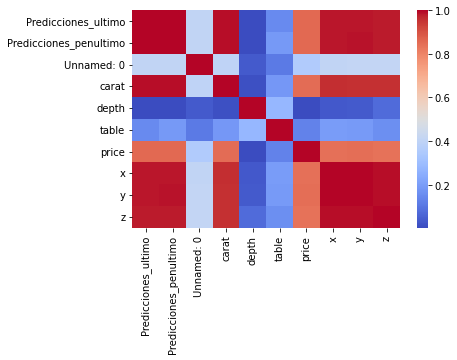

In [25]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

<AxesSubplot:>

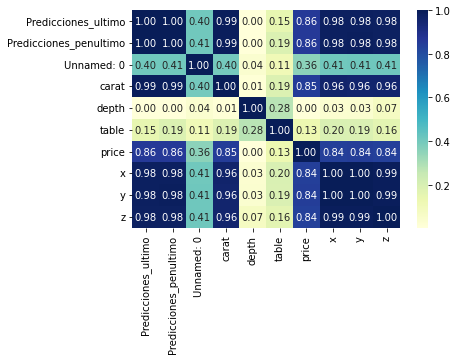

In [26]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map